# AI-Powered Trade Compliance Risk Detection System - Data cleaning file

## Introduction

Global trade operations generate large volumes of customs and transaction data that must be monitored for irregularities, misclassification, and compliance risk. Detecting abnormal trade patterns early is critical for preventing financial penalties and operational disruptions.

This project develops an AI-powered trade monitoring system using multi-year India import and export data. By combining feature engineering, statistical analysis, and unsupervised anomaly detection, the system identifies unusual trade spikes, price deviations, and volatility patterns across HS-coded commodities.

The objective is to demonstrate how data science and AI can support trade compliance, risk detection, and automated reporting in international trade environments.


## Data Source

The dataset used in this project is publicly available on Kaggle:

Lakshya AG. *India Trade Data (2010–2021)*.
Available at: https://www.kaggle.com/datasets/lakshyaag/india-trade-data

In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# I will use the data from 2010-2021
export_df = pd.read_csv(r'C:\Users\irene\OneDrive\Υπολογιστής\TuE\projects\india-trade-analytics\archive\2010_2021_HS2_export.csv')
import_df = pd.read_csv(r'C:\Users\irene\OneDrive\Υπολογιστής\TuE\projects\india-trade-analytics\archive\2010_2021_HS2_import.csv')


In [21]:
print(export_df.keys(), import_df.keys())
print(export_df.shape, import_df.shape)

Index(['HSCode', 'Commodity', 'value', 'country', 'year'], dtype='str') Index(['HSCode', 'Commodity', 'value', 'country', 'year'], dtype='str')
(184755, 5) (101051, 5)


In [22]:
#Checking if thev HsCode column is correct
export_df['HSCode'].astype(str).str.len().unique()
import_df['HSCode'].astype(str).str.len().unique()


array([1, 2])

## Why Focus on Export Data

This project focuses on **export trade data** because exports better reflect a country's sector strengths and international competitiveness.

Export flows typically show clearer trends and more stable patterns, making them suitable for:
- Time-series forecasting
- Growth analysis
- Anomaly detection

Exports also allow structured evaluation of:
- Country concentration risk
- Market dependency
- Trade exposure

This makes export data well-suited for building a trade risk and analytics system aligned with real-world business use cases.

# Step 1 : EDA and cleaning


## Data cleaning

In [24]:
export_df.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,AFGHANISTAN,2010
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,NaN,AFGHANISTAN,2010


Getting some basic statistics on the dfs

In [26]:
export_df.describe()

,HSCode,value,year
count,184755.000000,165497.000000,184755.000000
mean,51.232291,22.233844,2015.590344
std,27.965879,223.795216,3.444532
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2013.000000
50%,52.000000,0.370000,2016.000000
75%,74.000000,3.870000,2019.000000
max,99.000000,19805.170000,2021.000000


In [31]:
print(export_df['year'].unique(), export_df['value'].unique(), export_df['HSCode'].unique(), export_df['country'].unique())

export_df['Commodity'].unique()



[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021] [1.4000e+00 8.0000e-02 3.8900e+00 ... 7.7620e+01 1.3486e+02 1.2392e+02] [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29 30 32 33 34 35 37 38 39 40 42 44 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 78 81 82 83 84
 85 86 87 88 90 91 92 94 95 96 97 98 99 36 26 31 46 47 80 41 93 89  1 45
 79 43] <StringArray>
[                             'AFGHANISTAN',
                                  'ALBANIA',
                                  'ALGERIA',
                              'AMERI SAMOA',
                                  'ANDORRA',
                                   'ANGOLA',
                                 'ANGUILLA',
                                'ANTARTICA',
                                  'ANTIGUA',
                                'ARGENTINA',
 ...
                             'VATICAN CITY',
                                  'CURACAO',
 'INSTA

<StringArray>
[                                                                                                                           'MEAT AND EDIBLE MEAT OFFAL.',
                                                                                        'FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.',
                                             'DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.',
                                                                                        'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
                                                            'LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.',
                                                                                                        'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.',
                                                        

In [39]:
export_df.info()
export_df.isna().sum()


<class 'pandas.DataFrame'>
RangeIndex: 184755 entries, 0 to 184754
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     184755 non-null  int64  
 1   Commodity  184755 non-null  str    
 2   value      165497 non-null  float64
 3   country    184755 non-null  str    
 4   year       184755 non-null  int64  
dtypes: float64(1), int64(2), str(2)
memory usage: 7.0 MB


HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

In [40]:
# Strip whitespace
export_df["HSCode"] = export_df["HSCode"].astype(str).str.strip()
export_df["Commodity"] = export_df["Commodity"].astype(str).str.strip()
export_df["country"] = export_df["country"].astype(str).str.strip()

# Normalize country casing
export_df["country"] = export_df["country"].str.title()

# Remove non-digit characters from HSCode
export_df["HSCode"] = export_df["HSCode"].str.replace(r"\D+", "", regex=True)

# Collapse extra whitespace in Commodity
export_df["Commodity"] = export_df["Commodity"].str.replace(r"\s+", " ", regex=True)


In [41]:
export_df = export_df.drop_duplicates()


For nan values, we notice they are only present in the value column, we will first check how much of it is missing

In [43]:
missing_value_pct = export_df["value"].isna().mean() * 100
missing_value_pct


np.float64(10.423533869178101)

Since it is only 10 percent, and value is a core column for our analysis, we wil simply drop columns with missing values.

In [44]:
print("Before:", len(export_df))

export_df = export_df.dropna(subset=["value"])
print("After:", len(export_df))


Before: 184755
After: 165497


In [52]:
export_df["value"].describe()


count    165497.000000
mean         22.233844
std         223.795216
min           0.000000
25%           0.030000
50%           0.370000
75%           3.870000
max       19805.170000
Name: value, dtype: float64

We see that all non-positive values are actually zero, and none are negative, holding a placeholder row position in dataset.
If there was any negative value rows, we would have to remove them since we use the exporting file.

## Visualisations and EDA


<Axes: xlabel='year'>

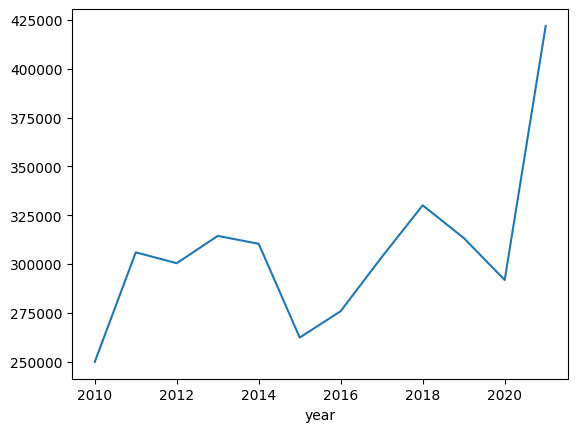

In [55]:
yearly = export_df.groupby("year")["value"].sum()
yearly.plot()


<Axes: ylabel='country'>

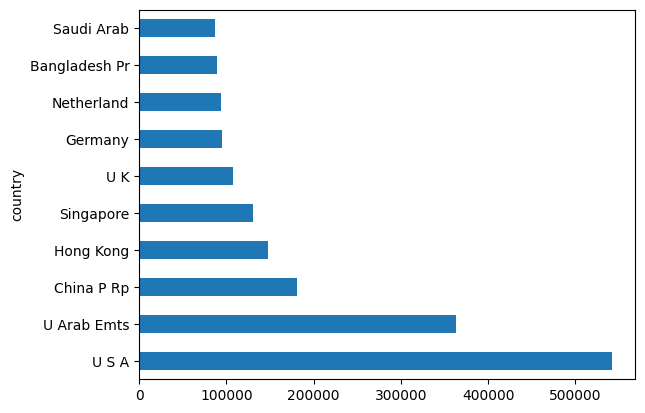

In [56]:
#country dependency plot
top_countries = export_df.groupby("country")["value"].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind="barh")


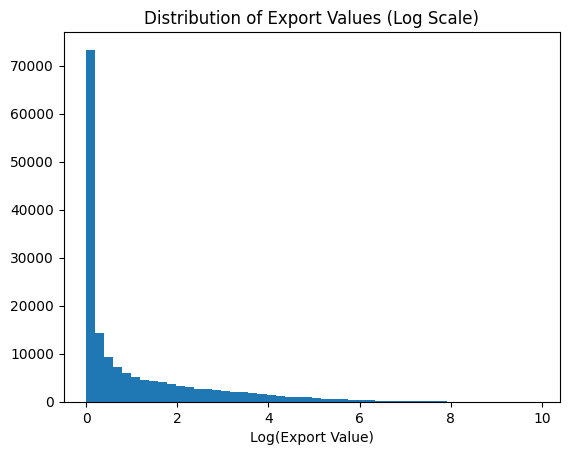

In [61]:
import numpy as np

plt.figure()
plt.hist(np.log1p(export_df["value"]), bins=50)
plt.xlabel("Log(Export Value)")
plt.title("Distribution of Export Values (Log Scale)")
plt.show()


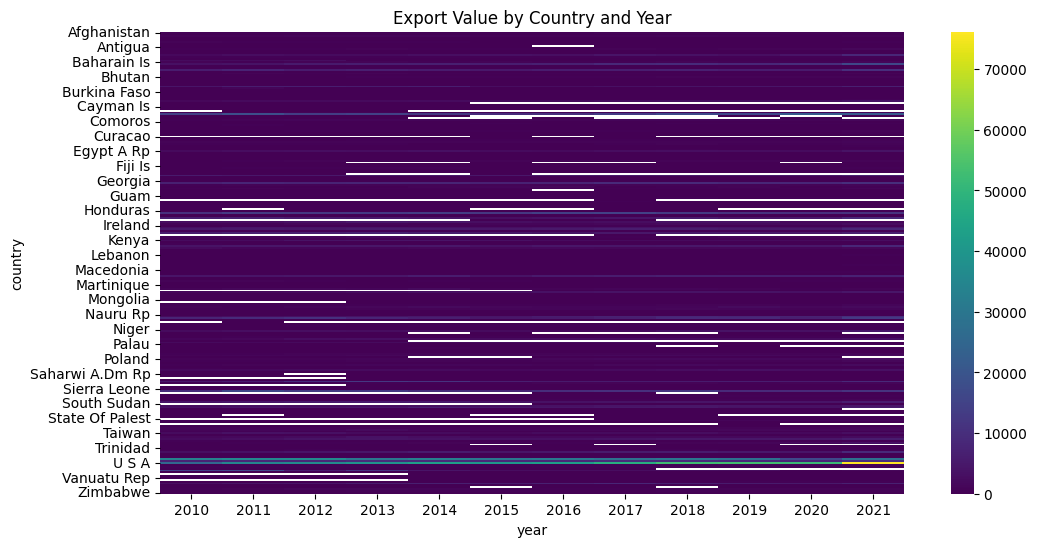

In [64]:

country_year = (
    export_df
    .groupby(["country", "year"])["value"]
    .sum()
    .unstack()
)

plt.figure(figsize=(12,6))
sns.heatmap(country_year, cmap="viridis")
plt.title("Export Value by Country and Year")
plt.show()


### Interpetation of visualizations

 1. Export Trend Over Time :
Total export values show moderate fluctuations between 2010–2020, followed by a sharp increase in 2021. This spike may indicate post-crisis recovery, structural trade expansion, or a data anomaly worth further investigation.

 2. Country Concentration :
Exports are highly concentrated. The United States and the United Arab Emirates dominate export destinations, with a significant gap compared to other countries. This suggests potential dependency risk on a small number of trade partners.

 3. Distribution of Export Values :
The distribution of export values (log scale) is heavily right-skewed, confirming that trade data is highly unequal. A small number of transactions account for large trade volumes, while most flows are relatively small.

 4. Country–Year Heatmap :
The heatmap shows that export activity is uneven across countries and years. Only a limited set of countries consistently exhibit strong export flows, reinforcing the presence of concentration patterns.

---

Overall, the data suggests strong country concentration, heavy-tailed trade distributions, and a structural increase in recent years — all relevant for trade risk and dependency analysis.


<Axes: title={'center': 'Country Concentration Index (HHI)'}, xlabel='year'>

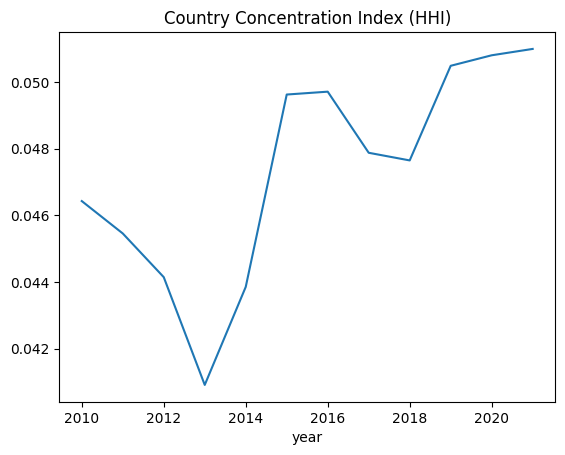

In [65]:
# some visualizations more directly connected to the system
# Country share per year
country_year = (
    export_df
    .groupby(["year", "country"])["value"]
    .sum()
    .reset_index()
)

# Total exports per year
total_year = country_year.groupby("year")["value"].transform("sum")

country_year["share"] = country_year["value"] / total_year

# Herfindahl index per year, higher means more dependent on few countries
hhi = (
    country_year
    .groupby("year")["share"]
    .apply(lambda x: (x**2).sum())
)

hhi.plot(title="Country Concentration Index (HHI)")


<Axes: title={'center': 'Most Volatile Export Commodities'}, ylabel='Commodity'>

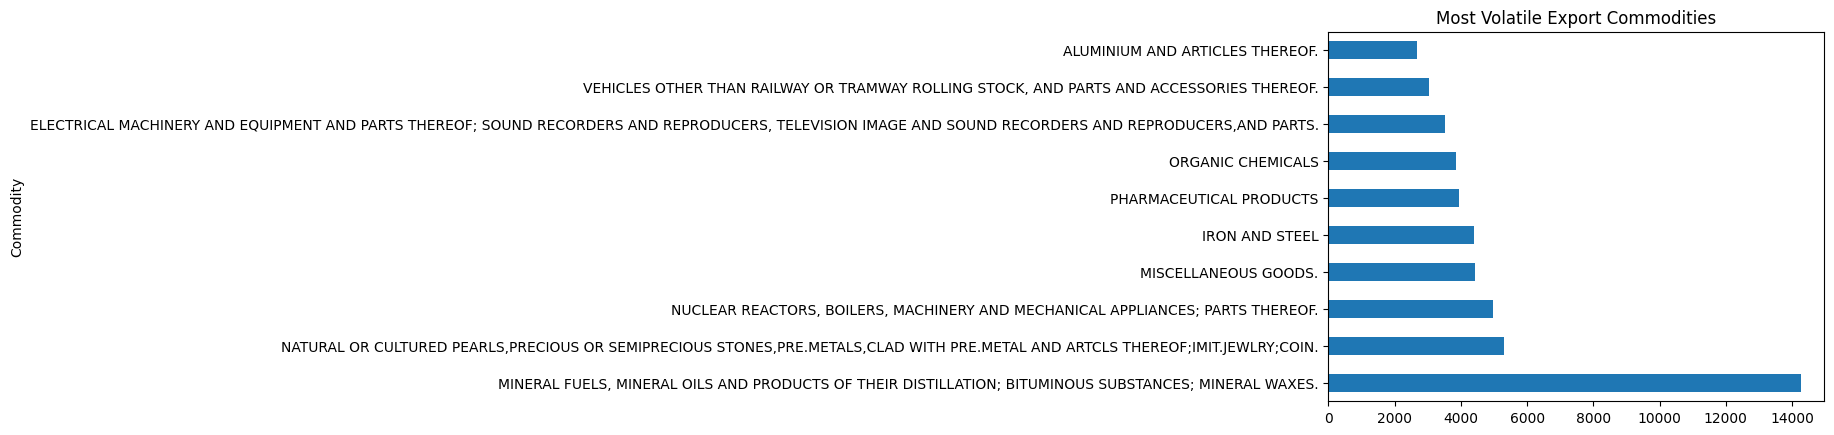

In [67]:
commodity_year = (
    export_df
    .groupby(["Commodity", "year"])["value"]
    .sum()
    .reset_index()
)

volatility = (
    commodity_year
    .groupby("Commodity")["value"]
    .std()
    .sort_values(ascending=False)
    .head(10)
)

volatility.plot(kind="barh", title="Most Volatile Export Commodities")


In [71]:
# save final csv
export_df.to_csv(r'C:\Users\irene\OneDrive\Υπολογιστής\TuE\projects\india-trade-analytics\datasets\exports_cleaned.csv', index=False)